# STATS 302 Midterm Project
## Luka Mdivani, Pierre Nanquette, Teodora Petkova

We are working on the wine quality dataset found on the following link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009<br>

Finally, we solved three problems: 

1. A regression problem which tried to figure out the quality of the wine as a continuous variable based on the features at hand. <br>
2. A binary classification problem which defined wine with quality above 7 as high quality wine, and below that as low quality wine. Then, based on the data, we try to predict if wine is high quality or low quality.
3. A classification problem which tries to predict the quality of the wine out of 6 possible classes.


## Part 0: Python and Data Imports

In [100]:
#All imports used in the notebook are in this cell:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.metrics import r2_score

import math


In [101]:
# Data Import

# Load data in a dataframe:
df = pd.read_csv("winequality-red.csv")
y = df['quality']

# Drop the y-column
df.drop('quality', axis='columns', inplace=True)

## Part 1: Exploratory Analysis

In [102]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


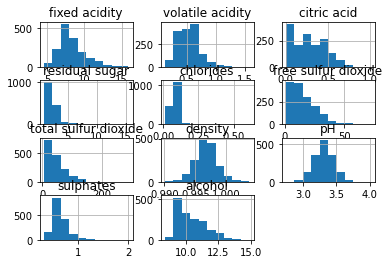

In [103]:
df.hist();

In [104]:
# Train-Test Split of the data

Xtrain, Xtest, ytrain, ytest = train_test_split(df,y,random_state =0)

In [105]:
scaler = StandardScaler()
std_Xtrain = scaler.fit_transform(Xtrain)
std_Xtest = scaler.transform(Xtest)

Text(0, 0.5, 'cumulative explained variance')

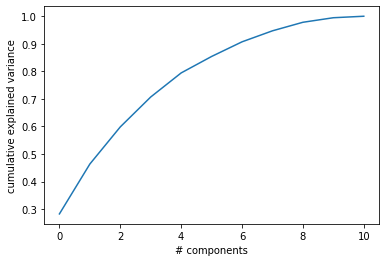

In [106]:
# PCA check on how many features explain the variance of the data
pca = PCA().fit_transform(std_Xtrain) 
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')


The cumulative explained variance shows that we might as well use all 10 available dimensions. 

## Part 2: Models

### Linear Regression


In [107]:
# VIF Analysis
data = df.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(11):
    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

VIF of fixed acidity: 74.45226538735389
VIF of volatile acidity: 17.060026123932275
VIF of citric acid: 9.183495167192477
VIF of residual sugar: 4.662992174051856
VIF of chlorides: 6.5548772185559905
VIF of free sulfur dioxide: 6.442682022072097
VIF of total sulfur dioxide: 6.519698942374763
VIF of density: 1479.2872086341736
VIF of pH: 1070.9676853792205
VIF of sulphates: 21.5906209233164
VIF of alcohol: 124.39486649768077


In [108]:
df['constant'] = [1]*1599 #for linear reg
res = sm.OLS(y,df).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          1.79e-145
Time:                        11:48:33   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0250 

> We can observe from VIF and P-values for coefficients fo the regression that some variables ( density, citric acid, fixed acidity, residual sugar, free sulfur dioxide) are redundant. From p-values we can not reject ${H}_{0}$ , thus their coefficient is 0 and we can remove them from the regression analysis. 

In [109]:
#Remove variables according to P-values
# TODO: Exaplin the addition of the new dataframe
df_filtered = df.drop('free sulfur dioxide', axis='columns')
df_filtered.drop('density', axis='columns', inplace=True)
df_filtered.drop('fixed acidity', axis='columns', inplace=True)
df_filtered.drop('citric acid', axis='columns', inplace=True)
df_filtered.drop('residual sugar', axis='columns', inplace=True)


In [110]:
# VIF analysis of the dataset without the extra columns
data = df_filtered.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(5):
    print("VIF of " + df_filtered.columns[i] + ": " + str(vif[i]))

VIF of volatile acidity: 1.227966801646607
VIF of chlorides: 1.3329767249777098
VIF of total sulfur dioxide: 1.053829759009383
VIF of pH: 1.2187072163627097
VIF of sulphates: 1.3212374333930237


>As we see from the new VIF values above, we can keep all the remaining variables in the regression, since their VIF is low. Thus our choice to remove some variables was effecetive.

### Filtered Train-Test Split and Standardization
The new train-test split is on the data without the highly correlated columns.

In [111]:
filtered_Xtrain, filtered_Xtest, filtered_ytrain, filtered_ytest = train_test_split(
    df_filtered, y, random_state =0
)

In [112]:
std_filtered_Xtrain = scaler.fit_transform(filtered_Xtrain)
std_filtered_Xtest = scaler.transform(filtered_Xtest)

In [113]:
res = sm.OLS(filtered_ytrain, filtered_Xtrain).fit()
linpred=res.predict(filtered_Xtest)
print("Testing R^2:", r2_score(filtered_ytest, linpred))
print(res.summary())

Testing R^2: 0.3400315594249539
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          3.33e-112
Time:                        11:48:33   Log-Likelihood:                -1188.5
No. Observations:                1199   AIC:                             2391.
Df Residuals:                    1192   BIC:                             2427.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------




#### *Result Anlysis*

<p> From the above summray of the linear regression we can see that the p-value for each coefficinet is small, thus for each of them we can reject the null hypothesis and say that coefficients are signifficantly different from 0. </p>

<p> We were using 7 variables for the regression, the magnitude of respective coefficients as well as the 95% confidence interval for them is given below. </p>

|Variable| Coefficient| 95% confidence interval |
|:-| :- | :-: |
|Volatile Acidity|  -1.1704 | \[-1.394 ,-0.947 \]|
|Chlorides|  -1.9238 | \[-2.803 ,-1.044 \]|
|Total Sulfur Dioxide|  -0.0023   | \[-0.003 ,-0.001 \]|
|pH| -0.4174 | \[-0.684 , -0.151 \]|
|Sulphates| 0.8148 | \[0.575 , 1.055 \]|
|Alcohol| 0.2832 | \[0.245 ,  0.321 \]|


<p> The accuracy of the model was decent but not impressive, the  values are in the table below. </p>

|Variable|$R^2$ Accuracy|
|:-|:- |
|Testing Accuracy| 0.34|
|Training Accuracy| 0.36|

<p> Even though linear regression can be validely applied to this dataset, intuitivelly it is easy to notice that the given task is more of a classification task rather than a regression problem. Morover the response variable only presents quality as an integer, but our regression returns float values. Thus the relativetly low accuracy of $R^2$ = 0.34 was expected. Classification approach to the problem might work better </p>

# Classification


### Train-Test Split for Classification

Here we will be performing classification analysis for the dataset. We will make a new responce variable which will classify everthing with >7 quality index as High(1) quality wine, and everything else as low(0) quality. This leaves us with a binary Classification problem.

In [114]:
binary_y = np.zeros(len(y))
for i in range(len(y)):
    binary_y[i] = y[i]>=7.0
bcl_Xtrain, bcl_Xtest, bcl_ytrain, bcl_ytest = train_test_split(
    df, binary_y, random_state=0
)


## Random Forest

In [115]:
tree_clf = RandomForestClassifier(n_estimators=100, random_state=0)
tree_clf.fit(bcl_Xtrain, bcl_ytrain)
ypred=tree_clf.predict(bcl_Xtest)
print(tree_clf.score(bcl_Xtest, bcl_ytest))
print(metrics.classification_report(bcl_ytest, ypred))

0.93
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       355
         1.0       0.76      0.56      0.64        45

    accuracy                           0.93       400
   macro avg       0.85      0.77      0.80       400
weighted avg       0.92      0.93      0.93       400



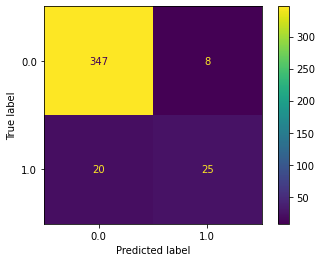

In [116]:

disp = metrics.ConfusionMatrixDisplay.from_predictions(bcl_ytest, ypred)    

In [117]:
importances = tree_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_clf.estimators_], axis=0)
for i in range(len(std)):
    print("Feature " +
    str((i+1)) +
    " importance is:" +
    str(round(importances[i],2)) +
    " 95% confidence interval: [" +
    str(round(importances[i]-2*std[i],2)) +
    "," +
    str(round(importances[i]+2*std[i],2)) +
    "]" +
    " (" +
    df.columns[i] +
    ")"
)

Feature 1 importance is:0.08 95% confidence interval: [0.0,0.15] (fixed acidity)
Feature 2 importance is:0.13 95% confidence interval: [0.02,0.23] (volatile acidity)
Feature 3 importance is:0.09 95% confidence interval: [0.01,0.16] (citric acid)
Feature 4 importance is:0.07 95% confidence interval: [0.01,0.12] (residual sugar)
Feature 5 importance is:0.08 95% confidence interval: [0.02,0.13] (chlorides)
Feature 6 importance is:0.06 95% confidence interval: [0.01,0.11] (free sulfur dioxide)
Feature 7 importance is:0.08 95% confidence interval: [0.02,0.13] (total sulfur dioxide)
Feature 8 importance is:0.09 95% confidence interval: [0.01,0.17] (density)
Feature 9 importance is:0.06 95% confidence interval: [0.01,0.12] (pH)
Feature 10 importance is:0.12 95% confidence interval: [0.03,0.21] (sulphates)
Feature 11 importance is:0.16 95% confidence interval: [0.04,0.28] (alcohol)
Feature 12 importance is:0.0 95% confidence interval: [0.0,0.0] (constant)


#### Random Forest on filtered data

In [118]:
# New test split

bcl_filtered_Xtrain, bcl_filtered_Xtest, bcl_filtered_ytrain, bcl_filtered_ytest = train_test_split(
    df_filtered, binary_y, random_state=0
)

In [119]:
tree_clf_1 = RandomForestClassifier(n_estimators=100, random_state=0)
tree_clf_1.fit(bcl_filtered_Xtrain, bcl_filtered_ytrain)
ypred = tree_clf_1.predict(bcl_filtered_Xtest)

print(
    "The achieved accuracy is: ", 
    tree_clf_1.score(bcl_filtered_Xtest, bcl_filtered_ytest)
)

The achieved accuracy is:  0.92


In [120]:
print(metrics.classification_report(bcl_filtered_ytest, ypred))


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       355
         1.0       0.69      0.53      0.60        45

    accuracy                           0.92       400
   macro avg       0.81      0.75      0.78       400
weighted avg       0.91      0.92      0.92       400



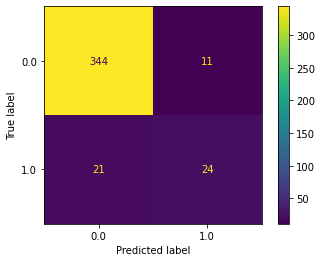

In [121]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    bcl_filtered_ytest, ypred
) 

In [122]:
importances_1 = tree_clf_1.feature_importances_
std_1 = np.std([tree.feature_importances_ for tree in tree_clf_1.estimators_], axis=0)

for i in range(len(std_1)):
    print("Feature " +
    str((i+1)) +
    " importance is:" +
    str(round(importances_1[i],2)) +
    " 95% confidence interval: [" +
    str(round(importances_1[i]-2*std_1[i],2)) +
    "," +
    str(round(importances_1[i]+2*std_1[i],2)) +
    "]" +
    " ("+df.columns[i] +
    ")"
)

Feature 1 importance is:0.19 95% confidence interval: [0.1,0.28] (fixed acidity)
Feature 2 importance is:0.14 95% confidence interval: [0.06,0.21] (volatile acidity)
Feature 3 importance is:0.14 95% confidence interval: [0.08,0.21] (citric acid)
Feature 4 importance is:0.12 95% confidence interval: [0.07,0.18] (residual sugar)
Feature 5 importance is:0.18 95% confidence interval: [0.12,0.25] (chlorides)
Feature 6 importance is:0.23 95% confidence interval: [0.14,0.32] (free sulfur dioxide)
Feature 7 importance is:0.0 95% confidence interval: [0.0,0.0] (total sulfur dioxide)


## Nonbinary Classification

### Data Train-test Split and Standardisation
We begin by observing the distribution of the classes in our training data.

Text(0.5, 1.0, 'Histogram of the Training Set')

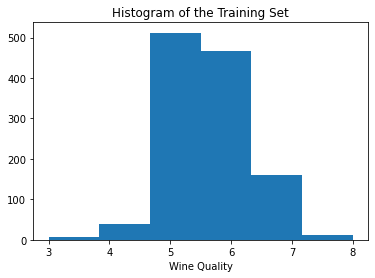

In [123]:
plt.hist(ytrain, bins=6)
plt.xlabel('Wine Quality')
plt.title('Histogram of the Training Set')

The graph above shows that the data is very imbalanced, hence this needs to be taken into account by our models.

After trying to use the *class_weight = 'balanced'* parameter for our models, the accuracy of our models diminished. We realized that working with a completely balanced dataset does not reflect the reality of our data, so we decided to use oversapling since the dataset is small, so undersampling would not work quite well. 

When using completely balanced oversampling of all classes, the accuracy of our models decreased and more points of classes 5 and 6 were mislabeled as other classes, but there was siginificant improvemnt in the correct identification of data from class 7.

To fix that, we tried ovarsampling in a bit more catious manner, by doubling classes 3, 4, 7, and 8, which have significantly less data than classes 5 and 6. The results were the same for the Logistic Regressor and the SVM, but the Random Forest Classifier performed better with this oversampling.<br>

Text(0.5, 1.0, 'Histogram of the Oversampled Training Set')

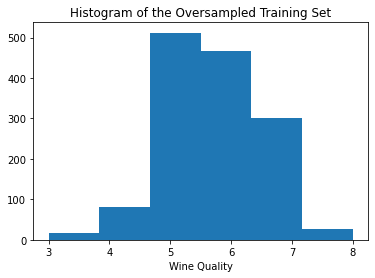

In [124]:
# Oversampling of the training data
ros = RandomOverSampler(sampling_strategy={3:16, 4:80, 7:300, 8:26})
X_train_ros, ytrain_ros = ros.fit_resample(std_filtered_Xtrain, ytrain)

plt.hist(ytrain_ros, bins=6)
plt.xlabel('Wine Quality')
plt.title('Histogram of the Oversampled Training Set')

### Logistic Regression Classifier

Accuracy is not affected by scaling, but the number of iterations blew up.

Accuracy when max_iter=1000, class_weight='balanced': 0.43

Normal accuracy with max_iter = 1000: 0.635. Different solvers did not change the accuracy for this one. 

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.385


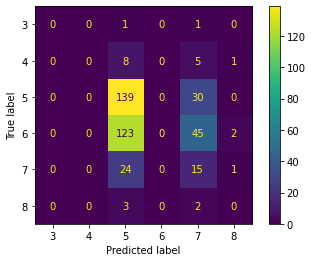

In [125]:
# Logistic Regression without oversampling

classifier = LogisticRegression(max_iter=1000, multi_class='multinomial')
classifier.fit(std_filtered_Xtrain, ytrain)
predicted = classifier.predict(filtered_Xtest)
print(classifier.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  


C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.3775


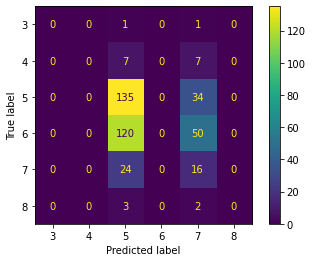

In [126]:
# Logistic regression with oversampling
classifier.fit(X_train_ros, ytrain_ros)
predicted = classifier.predict(filtered_Xtest)
print(classifier.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

### Random Forest Classifier

Default accuracy is 0.7

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.4125


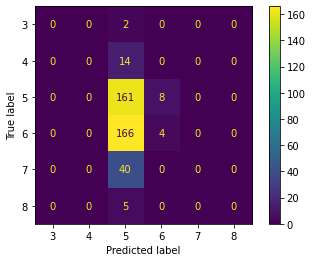

In [127]:
#Random forest classifier without oversampling
classifier = RandomForestClassifier(
    n_estimators = 1000,
    random_state = 0,
    oob_score = True
)
classifier.fit(std_filtered_Xtrain, ytrain)
predicted = classifier.predict(filtered_Xtest)
print(classifier.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.43


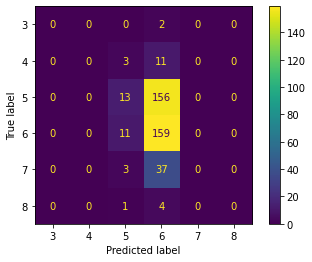

In [128]:
# Random forest classifier with oversampling
classifier.fit(X_train_ros, ytrain_ros)
predicted = classifier.predict(filtered_Xtest)
print(classifier.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.4225


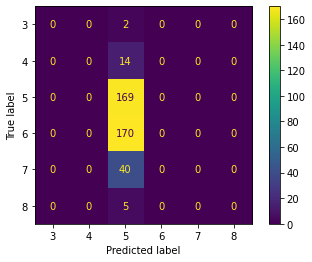

In [129]:
# SVM without oversampling
clf = svm.SVC(random_state=0)
clf.fit(std_filtered_Xtrain, ytrain)
predicted = clf.predict(filtered_Xtest)
print(clf.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.4225


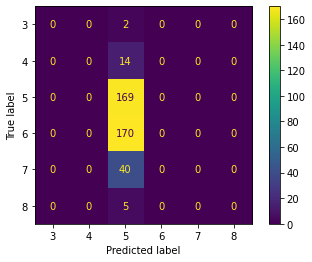

In [130]:
# SVM with oversampling
clf.fit(X_train_ros, ytrain_ros)
predicted = clf.predict(filtered_Xtest)
print(clf.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  